# <center> Project 1 - Unsupervised Learning Classification</center>
## <center> Due: Oct 15$^{th}$ 11:59 PM</center>

In this project, we are going to implement models. Unfortunately, the data set, `CS559_Fall21_Project1_02.csv`, is not labeled except the target, `Class`, and therefore, we can not straightly use supervised leanring algorithms until we learn about data - using unsupervised learning techniques in preprocessing is essential. To build models, we are allowed to use any of provided modules and libraries. **The exploratory and feature engineerings are required but not limited - all your work and process must be justified and explained in notebook.**

### Models:
- You are going to build three different classifiers using KMeans, K Nearest Neighbor (KNN), and Logistic Regression. 
    - KMeans: KMeans arbitrary use ID indices. Cluster ID indicates the subgroup number each observation belongs to and **it does not neccessary need to have the same ID as the target ID**. The task is to check whether the model clusters and subgroups each observation to the same classes. Then perform data preprocessing in order to subgroup observations correctly as much as possible. In order to check the accuracy of clustering, the cluster IDs  may need to be **relabeled** to match with their subgroup `Class` IDs. 
    - KNN: The accuracy of KNN will likely to decrease as k value increases. The task is to determine the threshold of k value reaches to **95%**. 
    - Logistic Regression: There are several assumptions/conditions needed in order for Logistic Regression to perform well. The task is to EDA to verify if the data is suitable for Logistic Regression and perform data preprocessing to raise the accuracy of model as high as possible. When the model was applied to the raw data, the accuracy was around 35%. 
- In this project, we are not interested in optimizing the models by tunning hyperparameters. Therefore, validation and testing are not necessary. Use the entire dataset as a train data set.     
- Accuracy Report: The accuracy is the accuracy of trained model (remember that we do not split the data set). The accuracy must be reported in Data Frame format as an example shown below. When you report the accuracy of models, please provide the name of algorithms, number of features used, and the accuracy in percentile. 
|Model Number | Algorithm (s)| Number of features | Accuracy (%)|
|---|---|---|---|
| 0 | Logistic Regression | 3 | 35%|
| 1 | KMeans | -- | -- |
| 2 | KNN | -- | -- |
| 3 | Logistic Regression | -- | -- |

### Grade Scheme: 

| Components | Maximum Points |
| --- | --- |
| Effort (cleanness, completeness, etc)| 20 |
| EDA and Feature Engineering (w/ visualizations) | 20 |
| Modeling | 20 |
| Explanation (w/ visualizations) | 20 |
| Result | 20 |


### Submission:
- No formal report. However, all work (EDA, Preprocessing, Modeling) must be **explained and summarized** at the end of each model, not in the middle of implementations. 
- Submit the notebook and its exported HTML files. 
- Considering the working period of the project, **NO LATE SUBMISSIONS ARE ACCEPTED**. 
- No resubmissions due to incorrect files, corrections, etc. 

#### Below, the libraries needed for this project are provided and plotting in 2-D and 3-D are also provided. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
def plot_2D(df,comp1,comp2,target):
    sns.scatterplot(x=comp1,y=comp2,data=df,hue=target)

def plot_3D(df, comp1,comp2,comp3,target):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[comp1],df[comp2],df[comp3],c=df[target])
    ax.set_xlabel(comp1)
    ax.set_ylabel(comp2)
    ax.set_zlabel(comp3)
    plt.show()

In [3]:
df = pd.read_csv('./CS559_Fall21_Project1_02.csv')

In [4]:
df.head(5)

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,Class
0,0,9.4202,-4.3507,10.3764,0.66768,0.33387,0.33355,0.33399,0.33367,0.33391,1
1,1,9.7044,-4.4601,10.6803,0.66749,0.33360,0.33352,0.33345,0.33363,0.33395,1
2,2,9.8075,-4.0894,10.6259,0.66742,0.33347,0.33315,0.33301,0.33364,0.33364,1
3,3,9.2771,-4.0349,10.1166,0.66782,0.33322,0.33394,0.33379,0.33380,0.33391,1
4,4,9.6447,-3.5968,10.2936,0.66768,0.33391,0.33301,0.33306,0.33326,0.33329,1


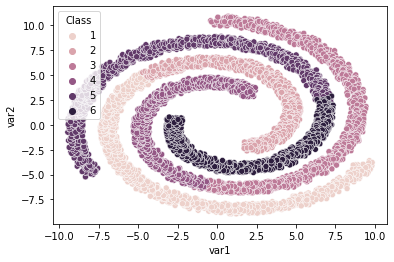

In [5]:
plot_2D(df,'var1', 'var2','Class')

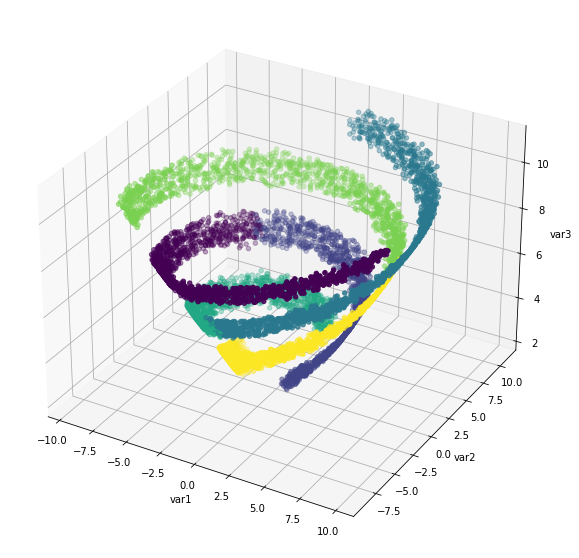

In [6]:
plot_3D(df,'var1','var2','var3','Class')

### Project 1 Starts from here

#### Model 1: KMeans

##### EDA / Preprocessing

In [7]:
##### EDA / Preprocessing starts here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    7500 non-null   int64  
 1   var1    7500 non-null   float64
 2   var2    7500 non-null   float64
 3   var3    7500 non-null   float64
 4   var4    7500 non-null   float64
 5   var5    7500 non-null   float64
 6   var6    7500 non-null   float64
 7   var7    7500 non-null   float64
 8   var8    7500 non-null   float64
 9   var9    7500 non-null   float64
 10  Class   7500 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 644.7 KB


In [8]:
df["Class"].value_counts()

4    1251
2    1251
6    1251
1    1249
5    1249
3    1249
Name: Class, dtype: int64

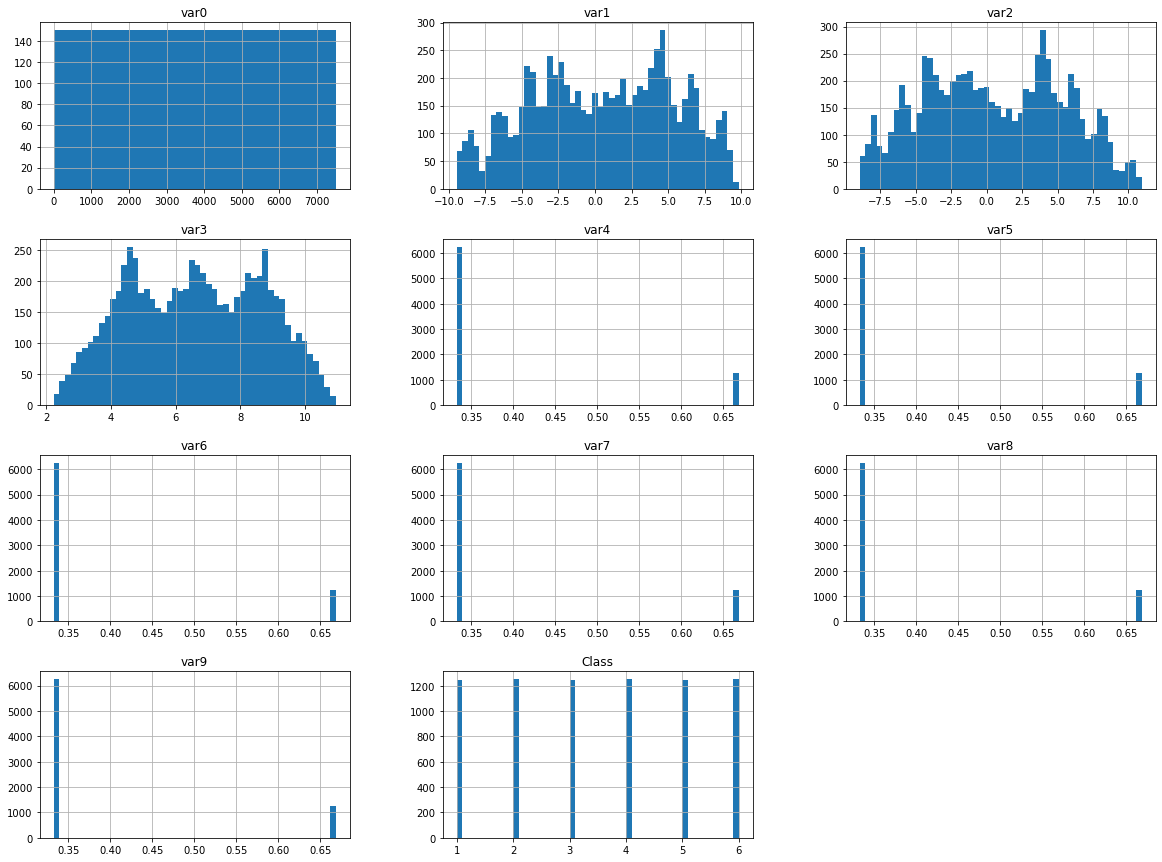

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
corr_matrix = df.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class    1.000000
var0     0.986013
var9     0.654867
var8     0.392910
var2     0.136978
var7     0.130868
var1    -0.046463
var6    -0.130842
var3    -0.252095
var5    -0.393054
var4    -0.654540
Name: Class, dtype: float64

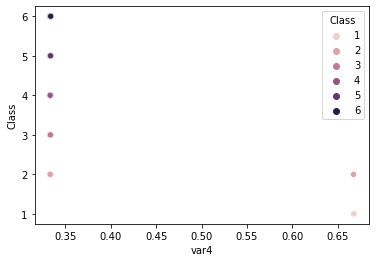

In [11]:
plot_2D(df,'var4', 'Class','Class')

In [12]:
dumm = pd.get_dummies(df.Class)
newdf = df.join(dumm)
corr = newdf.corr()
corr.style.background_gradient(cmap='coolwarm')

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,Class,1,2,3,4,5,6
var0,1.000000,-0.045948,0.135148,-0.328274,-0.645486,-0.387556,-0.129119,0.129038,0.387307,0.645703,0.986013,-0.645291,-0.387588,-0.129141,0.129058,0.387009,0.645704
var1,-0.045948,1.000000,-0.001150,0.165205,-0.196908,0.160217,0.441620,-0.261986,-0.245783,0.102911,-0.046463,-0.196594,0.160165,0.441862,-0.262022,-0.246323,0.102910
var2,0.135148,-0.001150,1.000000,0.162642,-0.396994,0.210011,0.026827,0.032716,0.371534,-0.243999,0.136978,-0.397491,0.210009,0.027370,0.032702,0.371414,-0.244003
var3,-0.328274,0.165205,0.162642,1.000000,0.285677,-0.285425,0.426891,-0.408041,0.404614,-0.423195,-0.252095,0.285807,-0.285436,0.427051,-0.408050,0.404526,-0.423183
var4,-0.645486,-0.196908,-0.396994,0.285677,1.000000,-0.199162,-0.200029,-0.200025,-0.200033,-0.200108,-0.654540,0.999518,-0.199121,-0.199966,-0.200046,-0.199909,-0.200092
var5,-0.387556,0.160217,0.210011,-0.285425,-0.199162,1.000000,-0.200102,-0.200172,-0.200055,-0.200198,-0.393054,-0.200041,0.999997,-0.199994,-0.200179,-0.199970,-0.200196
var6,-0.129119,0.441620,0.026827,0.426891,-0.200029,-0.200102,1.000000,-0.199156,-0.200007,-0.200076,-0.130842,-0.199869,-0.200106,0.999517,-0.199148,-0.199927,-0.200082
var7,0.129038,-0.261986,0.032716,-0.408041,-0.200025,-0.200172,-0.199156,1.000000,-0.200106,-0.200161,0.130868,-0.199979,-0.200185,-0.200008,0.999997,-0.200008,-0.200202
var8,0.387307,-0.245783,0.371534,0.404614,-0.200033,-0.200055,-0.200007,-0.200106,1.000000,-0.199155,0.392910,-0.199933,-0.200085,-0.199887,-0.200099,0.999518,-0.199130
var9,0.645703,0.102911,-0.243999,-0.423195,-0.200108,-0.200198,-0.200076,-0.200161,-0.199155,1.000000,0.654867,-0.200016,-0.200194,-0.199995,-0.200152,-0.200025,0.999997


In [13]:
newdf = newdf[['var4','var5','var6','var7','var8','var9',1,2,3,4,5,6]]
corr = newdf.corr()
corr.style.background_gradient(cmap='coolwarm')

,var4,var5,var6,var7,var8,var9,1,2,3,4,5,6
var4,1.000000,-0.199162,-0.200029,-0.200025,-0.200033,-0.200108,0.999518,-0.199121,-0.199966,-0.200046,-0.199909,-0.200092
var5,-0.199162,1.000000,-0.200102,-0.200172,-0.200055,-0.200198,-0.200041,0.999997,-0.199994,-0.200179,-0.199970,-0.200196
var6,-0.200029,-0.200102,1.000000,-0.199156,-0.200007,-0.200076,-0.199869,-0.200106,0.999517,-0.199148,-0.199927,-0.200082
var7,-0.200025,-0.200172,-0.199156,1.000000,-0.200106,-0.200161,-0.199979,-0.200185,-0.200008,0.999997,-0.200008,-0.200202
var8,-0.200033,-0.200055,-0.200007,-0.200106,1.000000,-0.199155,-0.199933,-0.200085,-0.199887,-0.200099,0.999518,-0.199130
var9,-0.200108,-0.200198,-0.200076,-0.200161,-0.199155,1.000000,-0.200016,-0.200194,-0.199995,-0.200152,-0.200025,0.999997
1,0.999518,-0.200041,-0.199869,-0.199979,-0.199933,-0.200016,1.000000,-0.200000,-0.199808,-0.200000,-0.199808,-0.200000
2,-0.199121,0.999997,-0.200106,-0.200185,-0.200085,-0.200194,-0.200000,1.000000,-0.200000,-0.200192,-0.200000,-0.200192
3,-0.199966,-0.199994,0.999517,-0.200008,-0.199887,-0.199995,-0.199808,-0.200000,1.000000,-0.200000,-0.199808,-0.200000
4,-0.200046,-0.200179,-0.199148,0.999997,-0.200099,-0.200152,-0.200000,-0.200192,-0.200000,1.000000,-0.200000,-0.200192


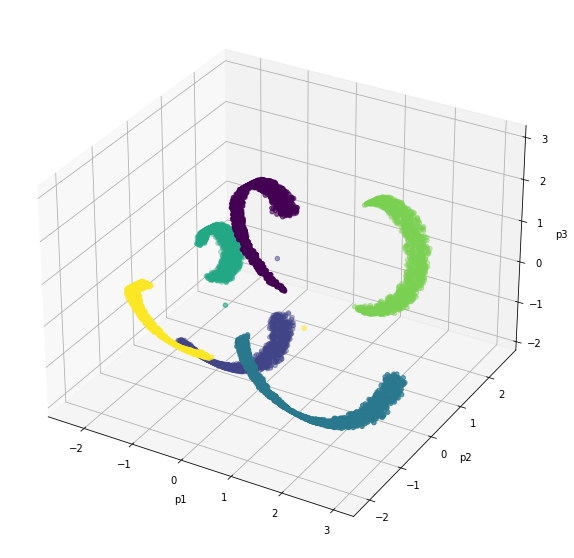

In [14]:
new_df = df[['var1', 'var2', 'var3', 'var4','var5', 'var6', 'var7', 'var8', 'var9']]

std = new_df.loc[:].values
std = StandardScaler().fit_transform(std)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(std)

principalDf = pd.DataFrame(data=principalComponents, columns=['p1', 'p2', 'p3'])
principalDf['target'] = df['Class']
plot_3D(principalDf,'p1','p2','p3','target')

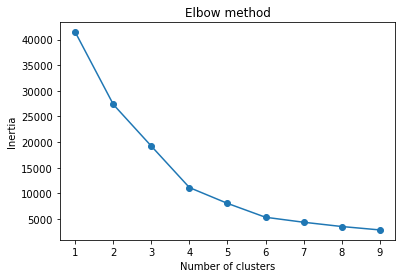

,Inertia
n = 1,41427.656056
n = 2,27337.971047
n = 3,19204.168587
n = 4,11128.148620
n = 5,8044.835428
n = 6,5336.880425
n = 7,4366.694523
n = 8,3533.940513
n = 9,2868.203706


In [15]:
kmeans = KMeans()
def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    tabular_result = pd.DataFrame(inertias, 
                                  index = ["n = {}".format(i) for i in range(1, len(inertias)+1)], 
                                  columns=['Inertia'])
    
    return tabular_result

new_df = principalDf[['p1', 'p2', 'p3']]
plot_inertia(kmeans, new_df, range(1, 10))

##### Model Implementation

In [16]:
##### Model Implementation starts here
kmeans = KMeans()
kmeans.set_params(n_clusters=6)
kmeans.fit(new_df)

km_guess = kmeans.predict(new_df)

##### Summary:

Through EDA, a few important things were found.

First by plotting histograms, it can be seen that var1, var2, and var3 are somewhat normally distributed. It can also be seen that var4, var5, var6, var7, var8, and var9 are 'quasi-categorical' in that they seem to only take on values around 0.33 and 0.66. Finally, the target 'Class' is categorical ranging from 1 through 6.

Second by looking at the correlation to 'Class' on the raw data, it can be seen that the data isn't very useful. This is because we are finding correlation to the numerical values of Class and not necessaraly with the categories themselves. Because of this, it was decided that it would be best to add 'categorical' columns ranging from Class 1 through Class 6 where the column value will indicate whether the data belongs to that class (where 1 indicates it is of the specified class and 0 indicates it is not).

Third, even though there is a very strong correlation between var0 and Class, var0 will not be used since it is simply enumerating the data.

Fourth, the first and second heatmap of correlations shows very strong relationships between var4-var9 and class1-class 6 respectively.

Fifth, by standardizing the features and using PCA, it is possible to cleanly seperate the data by class and then use KMeans to accuratley classify the data using the output of PCA to train it.

Lastly, the elbow graph clearly shows that n=6 is the best number of clusters to use, that is confirmed to be the truth since we already know there are 6 different classes in the data set.

#### Model 2: KNN

##### EDA / Preprocessing

In [17]:
##### EDA / Preprocessing starts here
new_df = df[['var1', 'var2', 'var3']]
def calcK(guess):
    count = 0
    class_guesses = []
    for _ in range(6):
        class_guesses.append(guess[count : count + 1250])
        count += 1250

    tright = 0
    for cg in class_guesses:
        cg = cg.tolist()
        mode = max(set(cg), key=cg.count)
        right = cg.count(mode)
        tright += right
    k = tright / 7500 * 100
    return k

accuracy = []
for k in range(1,21):
    knn = KNeighborsClassifier(k)
    knn.fit(new_df, df.iloc[:,-1])
    knn_guess = knn.predict(new_df)
    accuracy.append(calcK(knn_guess))
accuracy

[99.96000000000001,
 99.65333333333334,
 99.69333333333333,
 99.64,
 99.58666666666667,
 99.58666666666667,
 99.53333333333333,
 99.53333333333333,
 99.45333333333333,
 99.52,
 99.44,
 99.45333333333333,
 99.45333333333333,
 99.49333333333334,
 99.49333333333334,
 99.49333333333334,
 99.48,
 99.46666666666667,
 99.46666666666667,
 99.42666666666666]

In [18]:
k=500
below95 = False
while not below95:
    knn = KNeighborsClassifier(k)
    knn.fit(new_df, df.iloc[:,-1])
    knn_guess = knn.predict(new_df)
    accuracy = calcK(knn_guess)
    if accuracy < 95:
        break
    k+=1
k

509

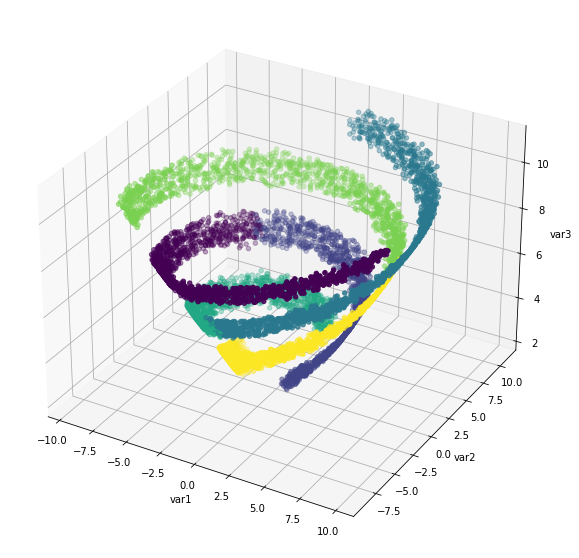

In [19]:
plot_3D(df,'var1','var2','var3','Class')

##### Model Implementation

In [20]:
##### Model Implementation starts here

knn = KNeighborsClassifier(k)
knn.fit(new_df, df.iloc[:,-1])

knn_guess = knn.predict(new_df)

#### Summary:

To avoid coliniarity and to simplify the model, var4-var9 should not be used. Graphing var1-var3 suggests that using those features would be good for KNN and the variables are aproximately normally distributed from the histogram made of all the feautures.

A quick analysis of n_neighbors shows that an n_neighbors=1 is sufficient in achieveing the highest level of accuracy.

It can be seen that a k of 509 drops the accuracy below 95%.

#### Model 3: Logistic Regression

##### EDA / Preprocessing

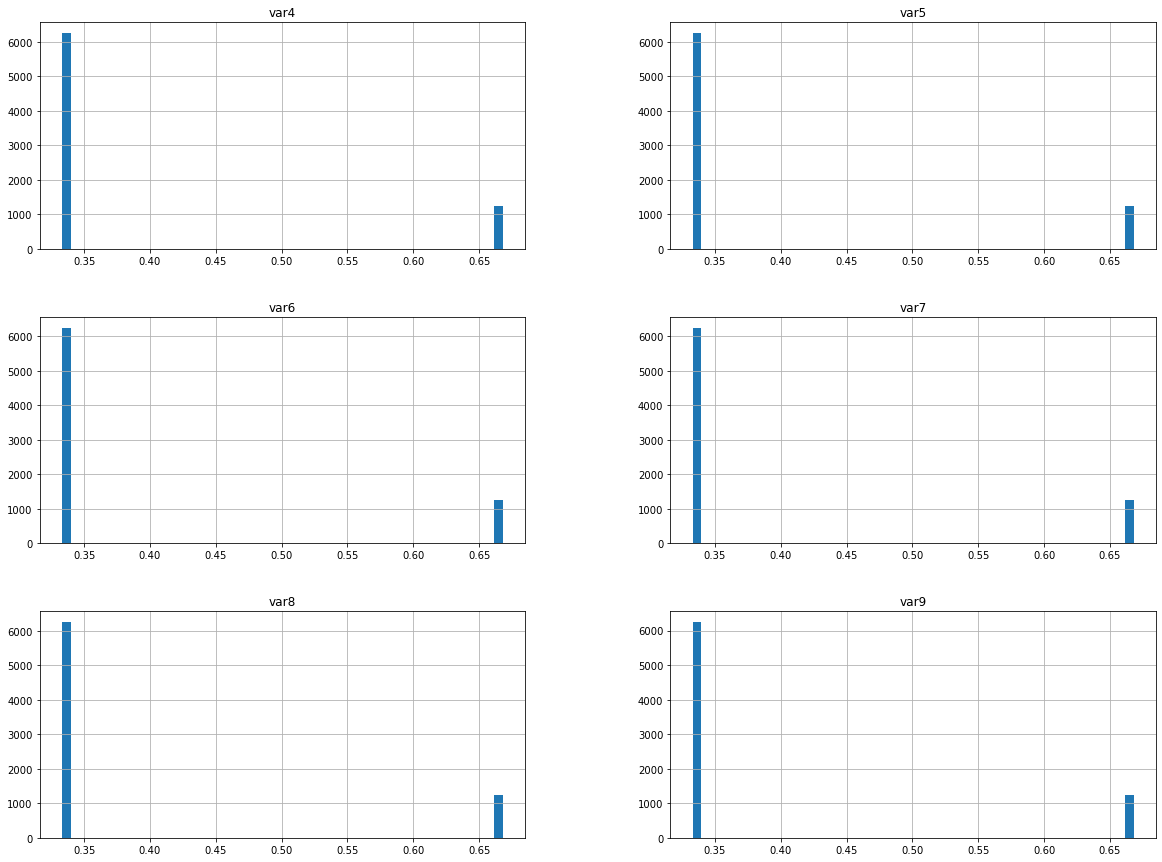

In [21]:
##### EDA / Preprocessing starts here
new_df = df[['var4', 'var5', 'var6', 'var7', 'var8', 'var9']]
new_df.hist(bins=50, figsize=(20,15))
plt.show()

In [22]:
dumm = pd.get_dummies(df.Class)
newdf = df.join(dumm)
newdf = newdf[['var4','var5','var6','var7','var8','var9',1,2,3,4,5,6]]
corr = newdf.corr()
corr.style.background_gradient(cmap='coolwarm')

,var4,var5,var6,var7,var8,var9,1,2,3,4,5,6
var4,1.000000,-0.199162,-0.200029,-0.200025,-0.200033,-0.200108,0.999518,-0.199121,-0.199966,-0.200046,-0.199909,-0.200092
var5,-0.199162,1.000000,-0.200102,-0.200172,-0.200055,-0.200198,-0.200041,0.999997,-0.199994,-0.200179,-0.199970,-0.200196
var6,-0.200029,-0.200102,1.000000,-0.199156,-0.200007,-0.200076,-0.199869,-0.200106,0.999517,-0.199148,-0.199927,-0.200082
var7,-0.200025,-0.200172,-0.199156,1.000000,-0.200106,-0.200161,-0.199979,-0.200185,-0.200008,0.999997,-0.200008,-0.200202
var8,-0.200033,-0.200055,-0.200007,-0.200106,1.000000,-0.199155,-0.199933,-0.200085,-0.199887,-0.200099,0.999518,-0.199130
var9,-0.200108,-0.200198,-0.200076,-0.200161,-0.199155,1.000000,-0.200016,-0.200194,-0.199995,-0.200152,-0.200025,0.999997
1,0.999518,-0.200041,-0.199869,-0.199979,-0.199933,-0.200016,1.000000,-0.200000,-0.199808,-0.200000,-0.199808,-0.200000
2,-0.199121,0.999997,-0.200106,-0.200185,-0.200085,-0.200194,-0.200000,1.000000,-0.200000,-0.200192,-0.200000,-0.200192
3,-0.199966,-0.199994,0.999517,-0.200008,-0.199887,-0.199995,-0.199808,-0.200000,1.000000,-0.200000,-0.199808,-0.200000
4,-0.200046,-0.200179,-0.199148,0.999997,-0.200099,-0.200152,-0.200000,-0.200192,-0.200000,1.000000,-0.200000,-0.200192


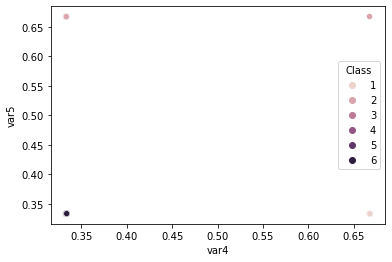

In [23]:
newdf = df[['var4','var5','var6','var7','var8','var9', 'Class']]
plot_2D(df,'var4', 'var5','Class')

##### Model Implementation

In [24]:
##### Model Implementation starts here
new_df = df[['var4', 'var5', 'var6', 'var7', 'var8', 'var9']]
lr = LogisticRegression()
lr.fit(new_df, df.iloc[:,-1])

lr_guess = lr.predict(new_df)

##### Summary:

Based on the analysis done above, var4-var9 was used because of its strong correlation with the target, the fact that it is binary (taking on only the values .33 and .66), the fact that there seems to be no multicollinearity based on the low correlations between the features, the fact that there is a large sample size, and that there are no outliers.

There seems to be independence between observations which is good for this model. There are no extreme outliers.

### Final Result Table:

In the result table, show only the **best result** obtained in each model. If the dataset were splitted into train and test sets, report the average of accuracy of train and test sets. 

In [25]:
km_k = calcK(km_guess)
knn_k = calcK(knn_guess)
lr_k = calcK(lr_guess)

Result1 = {'Model Number': [0,1,2], 'Algorithm':['KMeans','KNN','Logistic Regression'],'Number of Features': ['3 (afer PCA)',3,6],
           'Accuracy':[km_k,knn_k,lr_k]}

Result1 = pd.DataFrame(Result1, columns = ['Model Number', 'Algorithm','Number of Features','Accuracy'])
Result1


,Model Number,Algorithm,Number of Features,Accuracy
0,0,KMeans,3 (afer PCA),99.960000
1,1,KNN,3,94.946667
2,2,Logistic Regression,6,99.960000


All three models were able to perform to very high degrees of accuracy after a combination of EDA, scaling, and feature selection. Features were selected and/or scaled based on the model and the information that was able to be ascertained from EDA.